# <center>Лабораторна робота № 2</center>

Спочатку імпортуємо необхідні модулі та визначимо константи

In [1]:
import numpy as np
from math import floor, log
from functools import lru_cache, partial
from scipy.spatial.distance import euclidean

#для візуалізації
from mpl_toolkits import mplot3d 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt




# для перевірки обчислень
from scipy.optimize import minimize

In [2]:
h = 1e-5  #для знаходження центральної різницевої похідної
eps = 1e-5  #для визначення збіжності
lambd = 0.5  #для методу дроблення
beta = 1  #для методу дроблення
l = 1e-10 #довжина інтервалу невизначеності в методі Фібоначчі
ksi = 1e-10  #для методу Фібоначчі

### <center>Функція і знаходження градієнта чисельними методами (для будь-яких функцій багатьох змінних)

In [3]:
def f(x):
    """Функція"""
    return 3 * x[0] ** 2 + 2 * x[1] ** 2 - 0.01 * x[0] * x[1] + x[0] - x[1]


def f_alpha(alpha, x=[0], h=[0]):
    """Функція, яка потрібна для мінімізації по альфа"""
    return f(x + alpha * h)


def df(x):
    """Градієнт"""
    return np.array([(f(x + h * eye) - f(x - h * eye)) / (2 * h) for eye in np.eye(len(x))])

def d2f(x):
    """Матриця Якобі"""
    return [[(f(x + h * (eye_i + eye_j)/2) + f(x - h * (eye_i + eye_j)/2) - f(x + h * (eye_i - eye_j)/2) - f(x + h * (eye_j - eye_i)/2)) / h**2 for eye_j in np.eye(len(x))]for eye_i in np.eye(len(x))]

### <center>Побудова графіка функції 

Text(0.5,0,'f(x,y)')

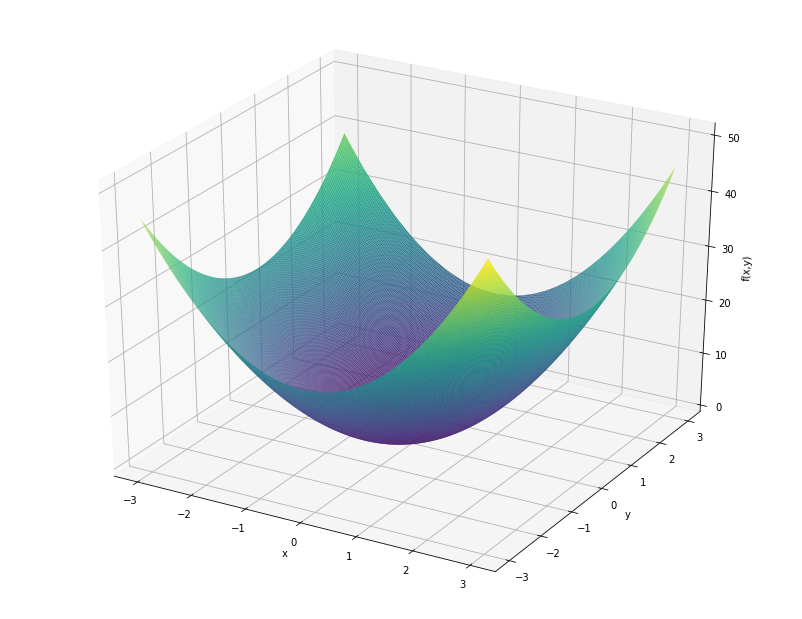

In [4]:
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)


plt.rcParams['figure.figsize'] = (14, 11)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')


In [5]:
# для самоперевірки
solution = minimize(f, np.zeros(2), method= 'L-BFGS-B').x
print(f"Мінімум досягається при х = {solution[0]}, y = {solution[1]}")


Мінімум досягається при х = -0.16625069812183513, y = 0.24958436894204078


## <center> Метод Ньютона (знаходження кроку методом дроблення)

In [6]:
def alpha_drob(x, h):
    alpha = beta
    while (f(x + alpha * h) - f(x)) >= eps ** 2:
        alpha = alpha * lambd
    return alpha  

In [7]:
def newton_method(start_point=np.zeros(2), visualize=False):
    """Метод Ньютона"""
    alphas = []
    h = - np.linalg.inv(d2f(start_point)).dot(df(start_point))
    x_cur = start_point
    alpha = 1
    alphas.append(alpha)
    x = x_cur + alpha * h 
    while abs(f(x) - f(x_cur)) >= eps:
        x_cur = x
        h = - np.linalg.inv(d2f(x_cur)).dot(df(x_cur))
        alpha = alpha_drob(x_cur, h)
        alphas.append(alpha)
        x = x_cur + alpha * h
    if visualize:
        return alphas
    return x

In [8]:
print(f"Мінімум функції досягається при x = {newton_method(np.array([10,10]))[0]}, y = {newton_method(np.array([10,10]))[1]}")

Мінімум функції досягається при x = -0.16625069271100434, y = 0.24958437326794486


In [10]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

alphas = newton_method(np.array([10,10]), visualize=True)
x = np.arange(len(alphas))
trace = go.Scatter(x=x, y=alphas, mode = 'markers')   
layout = {'title': f"Dependency alpha from step"}
iplot(go.Figure(data=[trace], layout=layout), show_link=True)